# Linear Regression: Boston House Price Prediction


## Problem Statement
---------------------------

The problem on hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us. 

----------------------------
## Data Information
---------------------------

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- **CRIM:**     per capita crime rate by town
- **ZN:**       proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:**    proportion of non-retail business acres per town
- **CHAS:**     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:**      nitric oxides concentration (parts per 10 million)
- **RM:**       average number of rooms per dwelling
- **AGE:**     proportion of owner-occupied units built prior to 1940
- **DIS:**      weighted distances to five Boston employment centres
- **RAD:**      index of accessibility to radial highways
- **TAX:**      full-value property-tax rate per 10,000 dollars
- **PTRATIO:**  pupil-teacher ratio by town
- **B1000:**  (Bk - 0.63)^2 where Bk is the proportion of blacks by town
- **LSTAT:**    %lower status of the population
- **MEDV:**     Median value of owner-occupied homes in 1000 dollars.

--------------------------------------------

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import pandas as pd
import numpy as np

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

# import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# import library for preparing data
from sklearn.model_selection import train_test_split

# import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

### Read the dataset

In [2]:
df = pd.read_csv("./housing.csv",  header=None, delim_whitespace=True)
df.head()s

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B', 'LSTAT','MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


* The price of the house indicated by the variable MEDV is the target variable and the rest are the independent variables based on which we will predict house price.

### Get information about the dataset using the info() method

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


* There are a total of 506 non-null observations in each of the columns. This indicates that there are no missing values in the data.

* Every column in this dataset is numeric in nature.

### summary statistics

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


**Observations:____**

- Crime rates average is 3.6 with very low crime rates in 50% of towns and extreme high rates in other towns.
- At least 50% of Boston towns have no zoned lands for large lot.
- The mean of CHAS is 0.07, which means that most of the houses are not on riverside.

Before performing the modeling, it is important to check the univariate distribution of the variables.

---------------------------
## Univariate Analysis
---------------------------

### Check the distribution of the variables

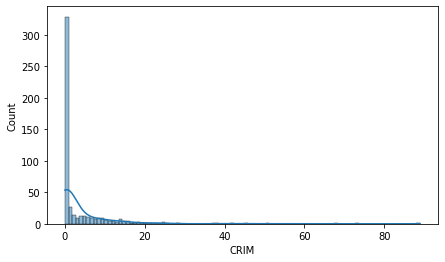

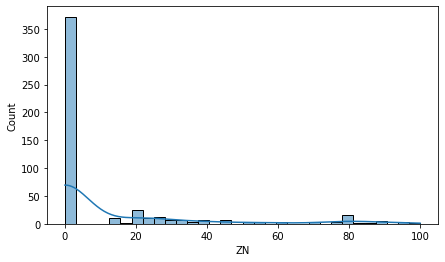

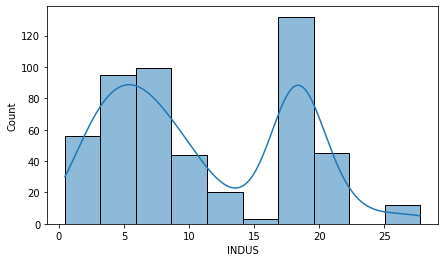

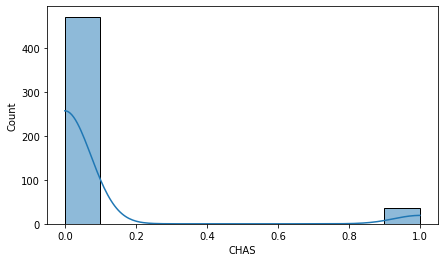

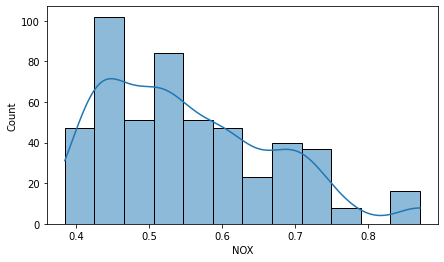

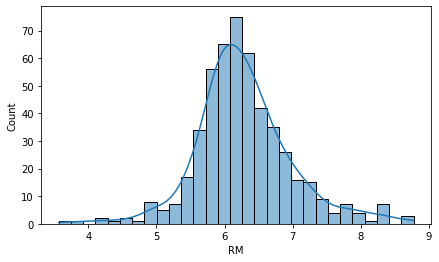

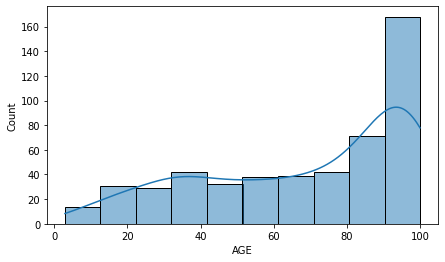

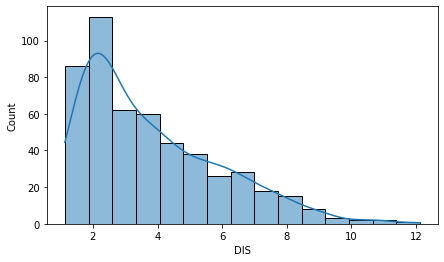

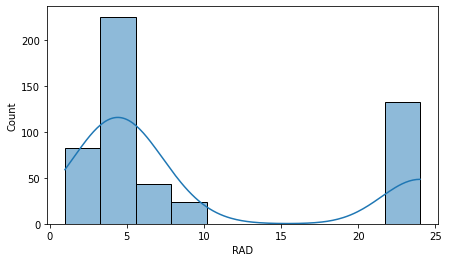

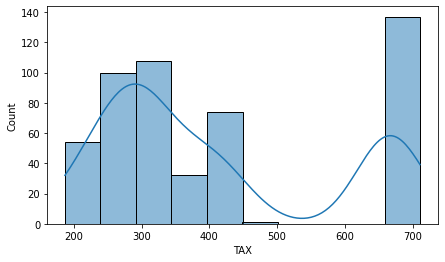

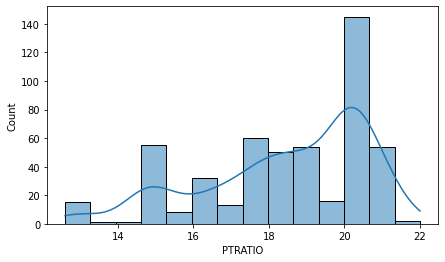

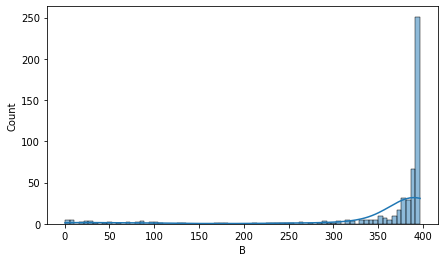

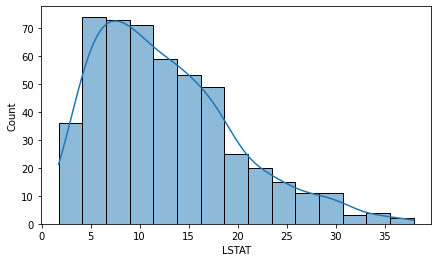

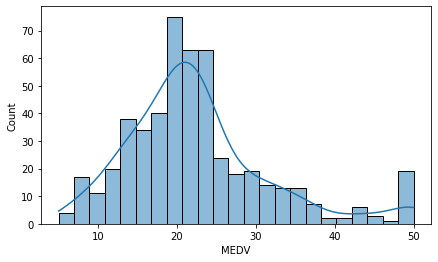

In [6]:
# let's plot all the columns to look at their distributions
for i in df.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=i, kde = True)
    plt.show()

* **The variables CRIM and ZN are positively skewed.** This suggests that most of the areas have lower crime rates and most residential plots are under the area of 25,000 sq. ft.
* **The variable CHAS, with only 2 possible values 0 and 1, follows a binomial distribution**, and the majority of the houses are away from Charles river (CHAS = 0).
* The distribution of the variable AGE suggests that many of the owner-occupied houses were built before 1940. 
* **The variable DIS** (average distances to five Boston employment centers) **has a nearly exponential distribution**, which indicates that most of the houses are closer to these employment centers.
* **The variables TAX and RAD have a bimodal distribution.**, indicating that the tax rate is possibly higher for some properties which have a high index of accessibility to radial highways.  
* The dependent variable MEDV seems to be slightly right skewed.

As the dependent variable is sightly skewed, we will apply a **log transformation on the 'MEDV' column** and check the distribution of the transformed column.

In [7]:
df['MEDV_log'] = np.log(df['MEDV'])

<AxesSubplot:xlabel='MEDV_log', ylabel='Count'>

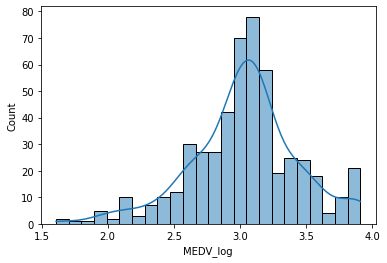

In [8]:
sns.histplot(data=df, x='MEDV_log', kde = True)

The log-transformed variable (**MEDV_log**) appears to have a **nearly normal distribution without skew**, and hence we can proceeed.

Before creating the linear regression model, it is important to check the bivariate relationship between the variables. Let's check the same using the heatmap and scatterplot.

---------------------------
## Bivariate Analysis
---------------------------

#### Let's check the correlation using the heatmap 

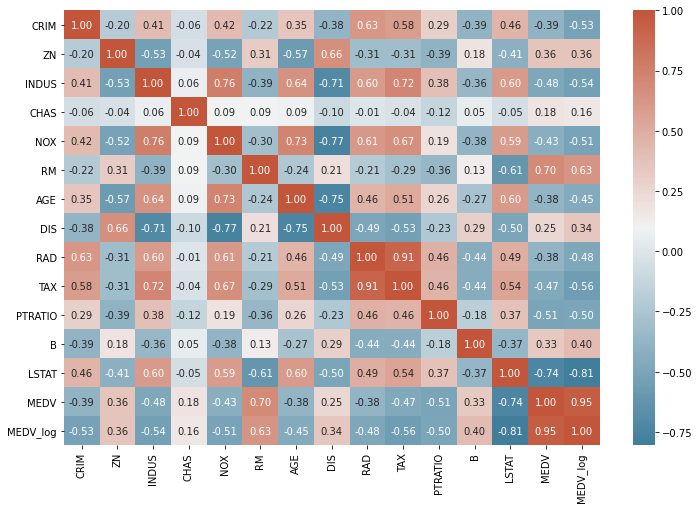

In [9]:
plt.figure(figsize=(12,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap=cmap ) 
plt.show()

**Observations:______**

- Proportion of non-retail business acres is positively correlated with oxide concentration. This implies town with high non-retail business areas have higher acids emissions. Could be a causation as well.
- Also, proportion of non-retail business acres is positively correlated with taxes. This implies that higher taxes are imposed on houses in town with high non-retail business areas.
- Number of rooms is positively correlated with house value, which makes sense.
- Oxide concentration is positively correlated with old owner-occupied buildings. This could transitively imply that old houses are more centered around non-retail business areas (which is positively correlated with oxid emissions).
- Distance from employeement centers is negatively correlated with propotion of non-retail business acres, oxide concentration, and proportion of owner-occupied buildings. This says towns away from employeement centers have more recent houses and less oxide concentration.
- Prices of houses is negatively correlated with low status of population which makes much sense.

Now, we will visualize the relationship between the pairs of features having significant correlations.

### Visualizing the relationship between the features having significant correlations (> 0.7) 

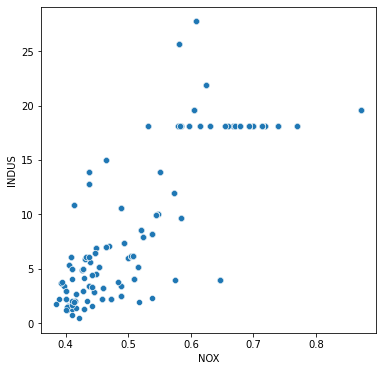

In [10]:
# scatterplot to visualize the relationship between NOX and INDUS
plt.figure(figsize=(6, 6))
sns.scatterplot(x=df['NOX'], y=df['INDUS'], data=df)
plt.show()

**Observations:____** It appears that there is no pattern in this correlation between the two features.

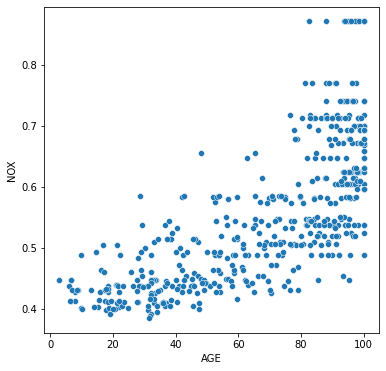

In [11]:
# scatterplot to visualize the relationship between AGE and NOX
plt.figure(figsize=(6, 6))
sns.scatterplot(x=df['AGE'], y=df['NOX'], data=df)

plt.show()

**Observations:____**
- The more proportion of owner-occupied units built prior to 1940 exist, the more oxides concentration. This implies that old owner-occupied houses are located in a geographical location closer to the oxide source than more recently-built houses.

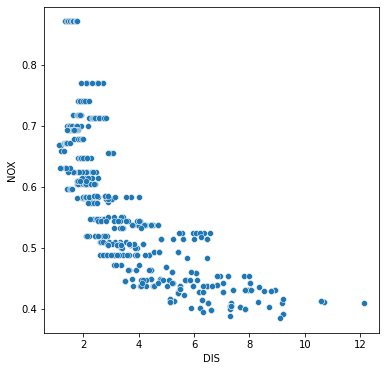

In [12]:
# scatterplot to visualize the relationship between DIS and NOX
plt.figure(figsize=(6, 6))
sns.scatterplot(y=df['NOX'], x=df['DIS'], data=df)

plt.show()

**Observations:___**
- The distant the house is from employeement centers, the less oxide concentration is there. This implies that empolyeement centers location is where the oxid source lies

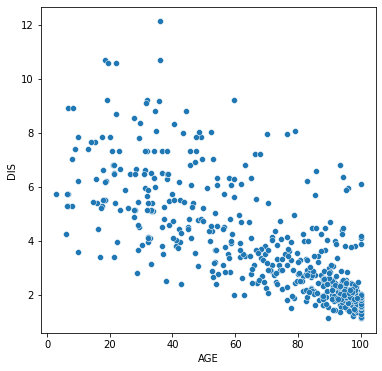

In [13]:
# scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'AGE', y = 'DIS', data = df)
plt.show()

- The distance of the houses to the Boston employment centers appears to decrease moderately as the the proportion of the old houses increase in the town. It is possible that the Boston employment centers are located in the established towns where proportion of owner-occupied units built prior to 1940 is comparatively high.

- This, along with the previous observations, support the assumption that old owner-occupied houses are closer to employeement centers and employeement centers are emitting oxides.

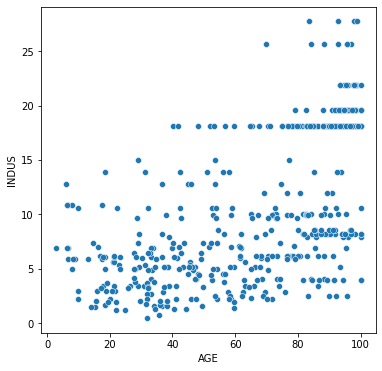

In [14]:
# scatterplot to visualize the relationship between AGE and INDUS
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'AGE', y = 'INDUS', data = df)
plt.show()

* No trend between the two variables is visible in the above plot.

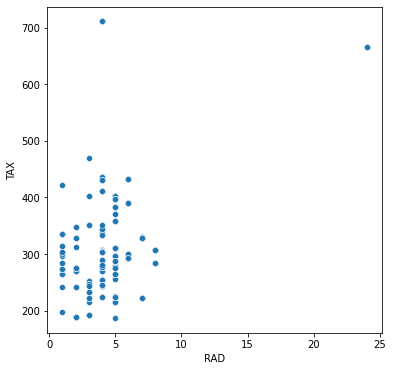

In [15]:
# scatterplot to visulaize the relationship between RAD and TAX
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'RAD', y = 'TAX', data = df)
plt.show()

The correlation between RAD and TAX is very high. But, no trend is visible between the two variables. 
This might be due to outliers. 

Let's check the correlation after removing the outliers.

In [16]:
# remove the data corresponding to high tax rate
df1 = df[df['TAX'] < 600]
# import the required function
from scipy.stats import pearsonr
# calculate the correlation
print('The correlation between TAX and RAD is', pearsonr(df1['TAX'], df1['RAD'])[0])

The correlation between TAX and RAD is 0.24975731331429196


So the high correlation between TAX and RAD is due to the outliers. The tax rate for some properties might be higher due to some other reason.

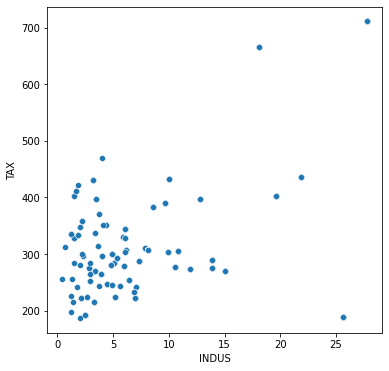

In [17]:
# scatterplot to visualize the relationship between INDUS and TAX
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'INDUS', y = 'TAX', data = df)
plt.show()

* The tax rate appears to increase with an increase in the proportion of non-retail business acres per town. This might be due to the reason that the variables TAX and INDUS are related with a third variable.

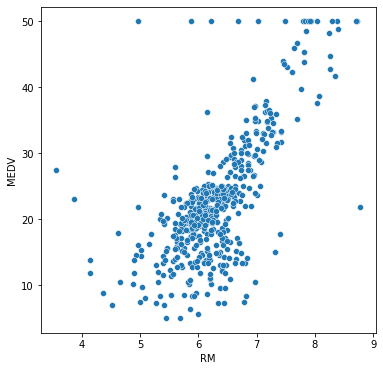

In [18]:
# scatterplot to visulaize the relationship between RM and MEDV
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'RM', y = 'MEDV', data = df)
plt.show()

* The price of the house seems to increase as the value of RM increases. This is expected as the price is generally higher for more rooms.

* There are a few outliers in a horizotal line as the MEDV value seems to be capped at 50.

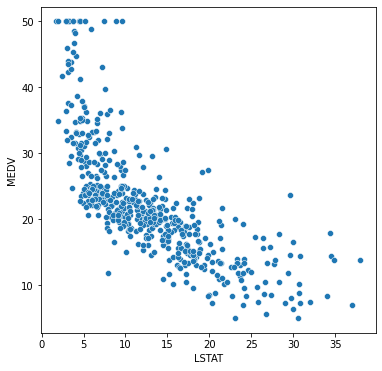

In [19]:
# scatterplot to visulaize the relationship between LSTAT and MEDV
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = df)
plt.show()

* The price of the house tends to decrease with an increase in LSTAT. This is also possible as the house price is lower in areas where lower status people live.

* There are few outliers and the data seems to be capped at 50.

We have seen that the variables LSTAT and RM have a linear relationship with the dependent variable MEDV. Also, there are significant relationships among a few independent variables, which is not desirable for a linear regression model. Let's first split the dataset.

### Split the dataset
Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test set.

In [20]:
# separate the dependent and indepedent variable
Y = df['MEDV_log']
X = df.drop(columns = {'MEDV', 'MEDV_log'})

# add the intercept term
X = sm.add_constant(X)

In [21]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

Next, we will check the multicollinearity in the train dataset.

### Check for Multicollinearity

We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped/treated till all the features have a VIF score < 5

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

    feature         VIF
0     const  585.099960
1      CRIM    1.993439
2        ZN    2.743911
3     INDUS    4.004462
4      CHAS    1.078490
5       NOX    4.430555
6        RM    1.879494
7       AGE    3.155351
8       DIS    4.361514
9       RAD    8.369185
10      TAX   10.194047
11  PTRATIO    1.948555
12        B    1.385213
13    LSTAT    2.926462


* There are two variables with a high VIF - RAD and TAX. Let's remove TAX as it has the highest VIF values and check the multicollinearity again.

### Drop the column 'TAX' from the training data and check if multicollinearity is removed

In [23]:
# create the model after dropping TAX
X_train = X_train.drop(['TAX'],1)

# check for VIF
print(checking_vif(X_train))

    feature         VIF
0     const  581.372515
1      CRIM    1.992236
2        ZN    2.483521
3     INDUS    3.277778
4      CHAS    1.052841
5       NOX    4.397232
6        RM    1.876243
7       AGE    3.154114
8       DIS    4.339453
9       RAD    2.978247
10  PTRATIO    1.914523
11        B    1.384927
12    LSTAT    2.924524


Now, we will create the linear regression model as the VIF is less than 5 for all the independent variables, and we can assume that multicollinearity has been removed between the variables.

### Create the linear regression model using statsmodels OLS and print the model summary.

In [24]:
# create the model
model1 = sm.OLS(y_train, X_train).fit()

# get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     95.56
Date:                Mon, 09 Aug 2021   Prob (F-statistic):          2.97e-101
Time:                        14:51:03   Log-Likelihood:                 78.262
No. Observations:                 354   AIC:                            -130.5
Df Residuals:                     341   BIC:                            -80.22
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4999      0.253     17.767      0.000       4.002       4.998
CRIM          -0.0122      0.002     -7.005      0.000      -0.016      -0.009
ZN             0.0010      0.001      1.417      0.157      -0.000       0.002
INDUS         -0.0002      0.003     -0.066      0.947      -0.006       0.005
CHAS           0.1164      0.039      3.008      0.003       0.040       0.193
NOX           -1.0297      0.187     -5.509      0.000      -1.397      -0.662
RM             0.0569      0.021      2.734      0.007       0.016       0.098
AGE            0.0003      0.001      0.390      0.697      -0.001       0.002
DIS           -0.0496      0.010     -4.841      0.000      -0.070      -0.029
RAD            0.0080      0.002      3.885      0.000       0.004       0.012
PTRATIO       -0.0458      0.007     -6.762      0.000      -0.059      -0.033
B              0.0002      0.000      1.796      0.073   -2.35e-05       0.001
LSTAT         -0.0291      0.002    -11.772      0.000      -0.034      -0.024
==============================================================================
Omnibus:                       33.707   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.726
Skew:                           0.387   Prob(JB):                     1.34e-22
Kurtosis:                       5.496   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Observations:_____**
- R square and adjusted R square values are large which gives a good level of confidence about the model.
- Independent variables (ZN, AGE, and INDUS) have a high p-value and low t, which implies a minimum significance.

### Drop insignificant variables from the above model and create the regression model again

### Examining the significance of the model

It is not enough to fit a multiple regression model to the data, it is necessary to check whether all the regression coefficients are significant or not. Significance here means whether the population regression parameters are significantly different from zero. 

From the above it may be noted that the regression coefficients corresponding to ZN, AGE, and INDUS are not statistically significant at level α = 0.05. In other words, the regression coefficients corresponding to these three are not significantly different from 0 in the population. Hence, we will eliminate the three features and create a new model.

In [25]:
# create the model after dropping TAX
Y = df['MEDV_log']

#write your code here
X = df.drop(columns = {'MEDV', 'MEDV_log', 'ZN', 'AGE', 'INDUS', 'TAX'}) 
X = sm.add_constant(X)

#splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

# create the model
model2 = sm.OLS(y_train, X_train).fit() 

# get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     127.5
Date:                Mon, 09 Aug 2021   Prob (F-statistic):          6.21e-104
Time:                        14:51:04   Log-Likelihood:                 77.190
No. Observations:                 354   AIC:                            -134.4
Df Residuals:                     344   BIC:                            -95.69
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5147      0.252     17.925      0.000       4.019       5.010
CRIM          -0.0119      0.002     -6.909      0.000      -0.015      -0.009
CHAS           0.1165      0.039      3.016      0.003       0.041       0.192
NOX           -1.0234      0.168     -6.086      0.000      -1.354      -0.693
RM             0.0622      0.020      3.089      0.002       0.023       0.102
DIS           -0.0434      0.008     -5.488      0.000      -0.059      -0.028
RAD            0.0083      0.002      4.092      0.000       0.004       0.012
PTRATIO       -0.0490      0.006     -7.936      0.000      -0.061      -0.037
B              0.0002      0.000      1.824      0.069   -1.95e-05       0.001
LSTAT         -0.0287      0.002    -12.577      0.000      -0.033      -0.024
==============================================================================
Omnibus:                       35.608   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.246
Skew:                           0.425   Prob(JB):                     2.31e-23
Kurtosis:                       5.519   Cond. No.                     9.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* We can see that the **R-squared value has decreased by 0.002**, since we have removed variables from the model, whereas the **adjusted R-squared value has increased by 0.001**, since we removed statistically insignificant variables only.

Now, we will check the linear regression assumptions.

### Check the below linear regression assumptions

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

#### Check for mean residuals

In [26]:
residuals = model2.resid
residuals.mean()

1.8698162917557014e-15

**Observations:____** Mean of residuals is close to zero, which supports the linear regression assumption.

#### Check for homoscedasticity



* Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to homoscedastic.

* Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

* We'll use `Goldfeldquandt Test` to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

In [27]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [28]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(y_train, X_train)
lzip(name, test)

[('F statistic', 1.0844138711700864), ('p-value', 0.30056482122464745)]

**Observations:____** P-value is greater than 0.05, so we fail to reject the null hypothesis. Meaning, the residuals have heteroscedasticity.

#### Linearity of variables

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

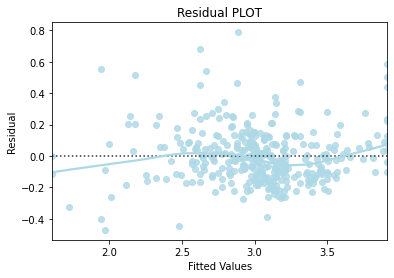

In [29]:
# predicted values
fitted = model2.fittedvalues

#sns.set_style("whitegrid")
sns.residplot(x = y_train, y = residuals , color="lightblue", lowess=True) 
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

**Observatioins:_____** We can see that residuals are randomly and uniformly scattered.

#### Normality of error terms
The residuals should be normally distributed.

<AxesSubplot:ylabel='Count'>

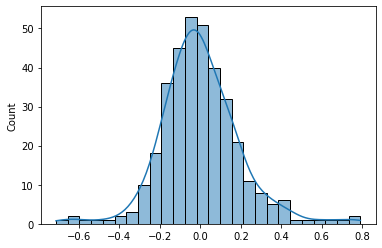

In [30]:
# Plot histogram of residuals
sns.histplot(residuals, kde=True)

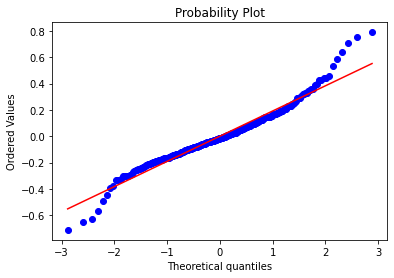

In [31]:
# Plot q-q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

**Observations:_____** We can see normality of distribution.

### Check the performance of the model on the train and test data set

In [32]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # Insample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance
model_pref(model2, X_train, X_test)

    Data      RMSE       MAE      MAPE
0  Train  0.194565  0.141729  4.919107
1   Test  0.191732  0.146199  5.069304


**Observations:____**
- In general, the low errors above give a positive impression about the model's accuracy.
- We can see that the errors have increased slightly on the test data. This suggested further investigation to improve the performance on general data.

#### Apply cross validation to improve the model and evaluate it using different evaluation metrics

In [33]:
# import the required function

from sklearn.model_selection import cross_val_score

# build the regression model and 
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error')                                


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.726 (+/- 0.251)
Mean Squared Error: 0.041 (+/- 0.024)


- The R-squared on the cross validation is 0.729, whereas on the training dataset it was 0.769
- And the MSE on cross validation is 0.041, whereas on the training dataset it was 0.038

We may want to reiterate the model building process again with new features or better feature engineering to increase the R-squared and decrease the MSE on cross validation.

### Get model Coefficients in a pandas dataframe with column 'Feature' having all the features and column 'Coefs' with all the corresponding Coefs. Write the regression equation.

In [34]:
coef = pd.Series(index = X_train.columns, data = model2.params.values)

coef_df = pd.DataFrame(data = {'Coefs': model2.params.values }, index =  X_train.columns)
coef_df

,Coefs
const,4.514720
CRIM,-0.011919
CHAS,0.116497
NOX,-1.023431
RM,0.062203
DIS,-0.043391
RAD,0.008288
PTRATIO,-0.049038
B,0.000249
LSTAT,-0.028659


In [35]:
# Let us write the equation of the fit
Equation = "log (Price) ="
print(Equation, end='\t')
for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

log (Price) =	( 4.514720483568421 ) *  const + ( -0.011918775173037776 ) *  CRIM + ( 0.11649715902151554 ) *  CHAS + ( -1.0234312247045114 ) *  NOX + ( 0.062202691330256465 ) *  RM + ( -0.04339113889561073 ) *  DIS + ( 0.00828769109170491 ) *  RAD + ( -0.04903790360575717 ) *  PTRATIO + ( 0.00024900512380057586 ) *  B + ( -0.028658731694441074 ) *  LSTAT + 

### Conclusions and business recommendations derived from the model

- We started by exploring the data and performing EDA including univariate and bivariate analysis.
- We checked for Multicollinearity which is found between RAD and TAX, based on that TAX was droped.
- We analyzed and drop insignificant variables (ZN, AGE, and INDUS).
- Then we checked the linear regression assumptions which held true.
- Then built the model, checked its performance and applied cross validation and concluded results.
- At least 50% of Boston towns have no zoned lands for large lot and most of the houses are not on Charles riverside.
- Most of the old owner-occupied houses are located closer employeement center where oxide concentration is high.
- The house prices increase as the rooms increases.

**Model Equation:** log (Price) = ( 4.649385823266652 ) const + ( -0.012500455079103941 ) CRIM + ( 0.11977319077019594 ) CHAS + ( -1.0562253516683235 ) NOX + ( 0.058906575109279144 ) RM + ( -0.044068890799406124 ) DIS + ( 0.007848474606244051 ) RAD + ( -0.048503620794999036 ) PTRATIO + ( -0.029277040479797338 ) * LSTAT

* From the equation we can derive that, the prices go high for houses located near Charles river and housed with many rooms.
* The prices are negatively affected mostly by the oxide concentration which is mostly high in employeement centers. Crime rates and residents profile also negatively affects prices.